<a id="0"></a> <br>

# Conteúdo da aula
1. [Alguns modelos úteis de sinais](#chapter1)  
   1. [Função degrau unitário $u(t)$](#section_1_1)
   2. [Função rampa unitária $r(t)$](#section_1_2)  
   3. [Impulso Unitário ou delta de dirac $δ(t)$](#section_1_3)
   4. [Função exponencial $e^{st}$](#section_1_4)
2. [Energia e Potência de um sinal](#chapter_2) 
    1. [Tamanho de um Sinal](#section_2_1) 
    2. [Energia de um Sinal](#section_2_2)
    3. [Potência de um sinal](#section_2_3)
    4. [Sinais de energia e sinais de potência](#section_2_4) 
  

 
**Fontes**: 

(Edition 4.0) Signals and Systems, Published 2022 by Michael Adams ISBN-13: 978-1-990707-00-1, ISBN: 1-990707-00-9

(2º Edição) Sinais e Sistemas Lineares, Puvlicado em 2004 - Tradução do original Linear Systems and Signals, 2E, por B. P. Lathi, ISBN 0-19-515833-4

# Alguns modelos úteis de sinais <a class="anchor" id="chapter1"></a>

## Função degrau unitário $u(t)$ <a class="anchor" id="section_1_1"></a>


Em várias de nossas discussões, os sinais começam em t = 0 (**sinais causais**). 

Tais sinais podem ser convenientemente descritos em termos da **função degrau unitário** $u(t)$: 

$u(t) = \begin{cases} 1, & t\geq 0 \\ 0, & t< 0 \end{cases}$

<img src = "../figs/degrau_unitario.png" width = "600">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Figuras com saída formatada ara expressões matemáticas
plt.rcParams['text.usetex'] = True

In [17]:
# Taxa de amostragem do sinal que iremos gerar
n = 1000

# Intervalo de tempo do sinal
t1 = -1
t2 = 5

# Amostrando o sinal no tempo
t = np.linspace(t1, t2, n)

In [6]:

# Sinal exponencial
x_ori = 0.5*np.exp(-0.5*t)

# Funçao degrau unitário
x_degrau = np.heaviside(t,1)

# resposta do sinal ao degrau unitário: Transformando o sinal exponencial em um sinal causal
x_final = x_ori*x_degrau


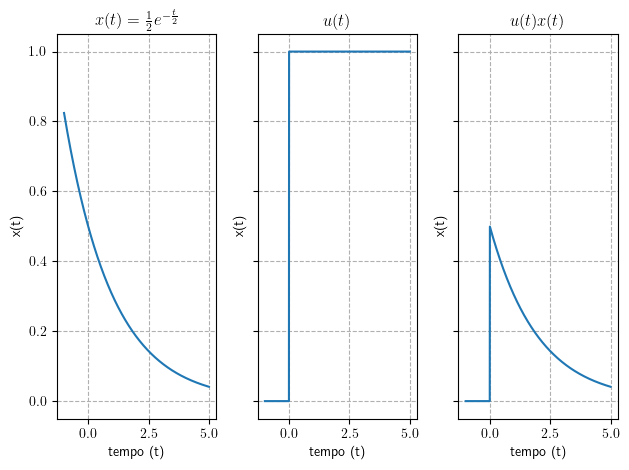

In [7]:
#vizualização
fig, ax = plt.subplots(1,3, sharey=True)

ax[0].plot(t, x_ori)
ax[0].set_xlabel ('tempo (t)')
ax[0].set_ylabel('x(t)')
ax[0].set_title(r'$x(t)= \frac{1}{2}e^{-\frac{t}{2}}$')
ax[0].grid(linestyle = '--')

ax[1].plot(t, x_degrau)
ax[1].set_xlabel ('tempo (t)')
ax[1].set_ylabel('x(t)')
ax[1].set_title(r'$u(t)$')
ax[1].grid(linestyle = '--')

ax[2].plot(t, x_final)
ax[2].set_xlabel ('tempo (t)')
ax[2].set_ylabel('x(t)')
ax[2].set_title(r'$u(t)x(t)$')
ax[2].grid(linestyle = '--')

plt.tight_layout()
plt.show()


### Caso discreto:

$u[n] = \begin{cases} 1, & n\geq 0 \\ 0, & n< 0 \end{cases}$

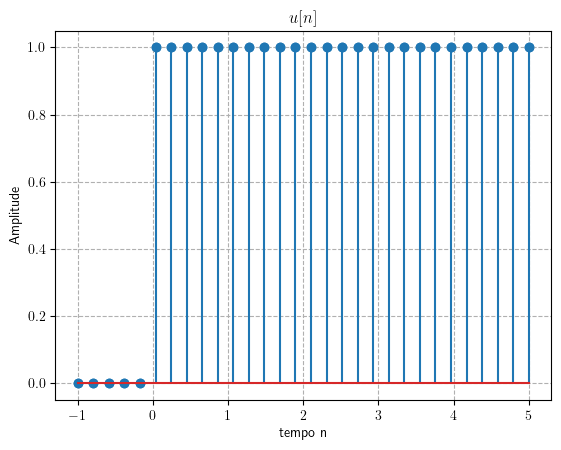

In [16]:
# Taxa de amostragem do sinal que iremos gerar
n = 30

# Intervalo de tempo do sinal
t1 = -1
t2 = 5

# Amostrando o sinal no tempo
t_dis = np.linspace(t1, t2, n)

# Funçao degrau unitário
x_degrau = np.heaviside(t_dis,1)

plt.scatter(t_dis, x_degrau)
plt.stem(t_dis, x_degrau)
plt.xlabel ('tempo n')
plt.ylabel('Amplitude')
plt.title(r'$u[n]$')
plt.grid(linestyle = '--')
plt.show()

## Função rampa unitária $r(t)$ <a class="anchor" id="section_1_2"></a>

Rampa unitária $r(t)$ é um sinal que varia uniformemente a partir do instante t=0, sendo zero antes disso. 

A rampa unitária $r(t)$ pode ser definida como a integral do degrau unitário $u(t)$.

$r(t) = \int_{-\infty}^t u(t) dt = \begin{cases} t, & t\geq 0 \\ 0, & t< 0 \end{cases}$

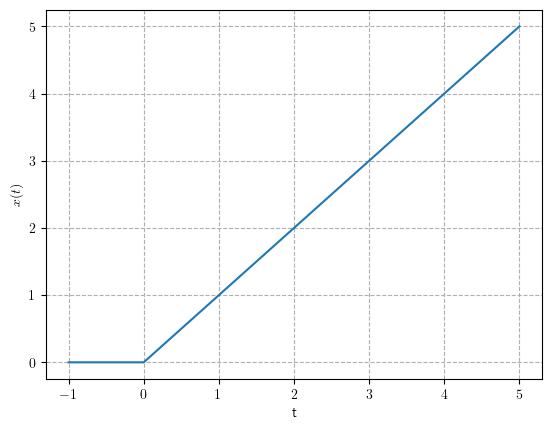

In [20]:
# Funçao rampa unitaria
x_rampa = np.where(t>=0, t, 0)

# visualização
plt.plot(t, x_rampa)
plt.xlabel('t')
plt.ylabel(r'$x(t)$')
plt.grid(linestyle = '--')
plt.show()

### Caso discreto:

$r[n] =  \begin{cases} n, & n\geq 0 \\ 0, & n< 0 \end{cases}$

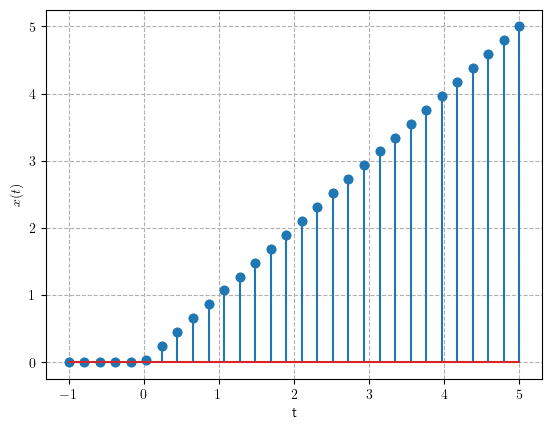

In [21]:
# Funçao rampa unitaria
x_rampa = np.where(t_dis>=0, t_dis, 0)

# visualização
plt.scatter(t_dis, x_rampa)
plt.stem(t_dis, x_rampa)
plt.xlabel('t')
plt.ylabel(r'$x(t)$')
plt.grid(linestyle = '--')
plt.show()

##  Impulso Unitário ou delta de dirac $δ(t)$ <a class="anchor" id="section_1_3"></a>


O impulso unitário $δ(t)$ é uma das mais importantes funções no estudo de sinais e sistemas.

<img src = "../figs/step-and-pulse.png" width = "500">


$\int_{-\infty}^{\infty} \delta(t)dt = 1$




Outros pulsos, tais como o exponencial, triangular ou Gaussiano também podem ser utilizados como uma aproximação do impulso. A característica importante da função impulso unitário não é sua forma, mas o fato de que sua duração efetiva (largura do pulso) tende para zero enquanto que a sua área permanece unitária.

Vamos considerar o que acontece quando multiplicamos o impulso unitário $\delta(t)$ por um sinal $\varphi(t)$ que sabemos
ser contínua para $t = 0$. Como o impulso possui valor não nulo apenas para $t = 0$, e o valor $\varphi(t)$ para $t = 0$ é $\varphi(0)$, obtemos:

$\varphi(t)\delta(t) = \varphi(0)\delta(t)$

Portanto, a multiplicação de uma função contínua no tempo $\varphi(t)$ pelo impulso unitário localizado em $t = 0$ resulta em um impulso, o qual é localizado em $t = 0$ e possui força $\varphi(0)$ (o valor de $\varphi(t)$ na localização do impulso).

In [34]:
from scipy import signal

# Taxa de amostragem do sinal que iremos gerar
n = 1000

# Intervalo de tempo do sinal
t1 = -1
t2 = 1

# Amostrando o sinal no tempo
t = np.linspace(t1, t2, n)

# impulso 
x_imp = signal.unit_impulse(1000, 'mid')

# sinal original
x_ori1 = 2*t**5+2

# resposta do sinal ao impulso
x_final1 = x_ori1*x_imp

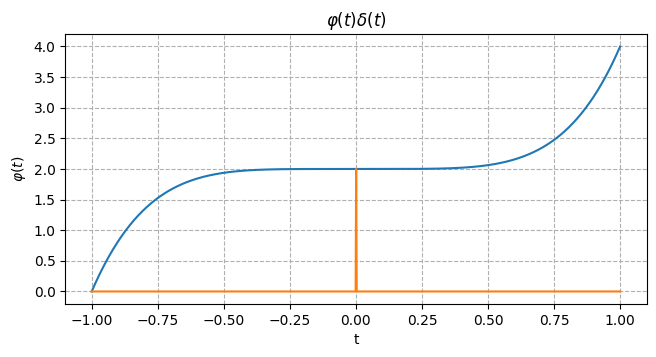

In [40]:
# visualização
plt.plot(t, x_ori1)
plt.plot(t, x_final1)
plt.xlabel('t')
plt.ylabel(r'$\varphi(t)$')
plt.title(r'$\varphi(t)\delta(t)$')
plt.grid(linestyle = '--')
plt.show()

Além disso, $\delta(t)$ não é nem mesmo uma função verdadeira no sentido ordinário. Uma função ordinária é especificada por seus valores para todo o tempo t. A função impulso é zero em todo
tempo exceto $t = 0$ e, mesmo na única parte interessante de sua faixa, ela é indefinida.

Estas dificuldades são resolvidas pela definição do impulso como uma função generalizada no lugar de uma função ordinária. Uma função generalizada é definida por seu efeito em outras funções em vez de seus valores em todo instante de tempo.

$\int_{-\infty}^{\infty}  \varphi(t)\delta(t-T)dt = \varphi(T)$

Definimos o impulso unitário como uma função na qual a área sob o seu produto com a função $\varphi(t)$ é igual ao valor da função $\varphi(t)$ no instante no qual o impulso está localizado.

### Caso discreto - A funçao delta de kronecker:

$\delta [n] = \begin{cases} 1, & n =  0 \\ 0, & n \neq 0 \end{cases}$

### Generalizaçao da funçao delta de kronecker:

$\delta [n-n_0] = \begin{cases} 1, & n =  n_0 \\ 0, & n \neq n_0 \end{cases}$

## Função exponencial $e^{st}$  <a class="anchor" id="section_1_4"></a>

Outra importante função na área de sinais e sistemas é o sinal exponencial $ x(t) = e^{st}$, onde $s$ é, geralmente, um número complexo, dado por

$s = \sigma +j\omega$

Logo, 

$e^{st} = e^{(\sigma +j\omega)t} = e^{\sigma t} e^{j\omega t} = e^{\sigma t}(\cos{\omega t + j \sin \omega t} )$ 

Como $s^* = \sigma - j\omega$, então:

$e^{s^*t} = e^{(\sigma -j\omega)t} = e^{\sigma t} e^{-j\omega t} = e^{\sigma t}(\cos{\omega t - j \sin \omega t} )$

A **variável de freqüência** $j\omega$ é generalizada para a variável complexa $s = \sigma + j\omega$.  Por esta razão, iremos chamar a variável $s$ de **freqüência complexa**. Sendo
 
* a variável $\omega$ chamada de **frequencia angular** do sinal
* a variável $\sigma$ chamada de **ângulo de fase** do sinal

A função $e^{st}$ definida acima engloba uma **grande classe de funções**. As seguintes funções são um caso especial ou podem ser descritas em termos de $e^{st}$:

* Uma constante $ke^{0t} = k\; (s = 0)$
* Uma exponencial monótona $e^{\sigma t} \; (\omega = 0, s = \sigma)$
* Uma senóide $\cos(\omega t) \; (\sigma = 0, s = \pm j\omega)$
* Uma senoide variando exponencialmente $e^{st}\; (s = \sigma \pm j\omega)$

In [25]:
# Taxa de amostragem do sinal que iremos gerar
n = 1000

# Intervalo de tempo do sinal
t1 = -5
t2 = 5

# Amostrando o sinal no tempo
t = np.linspace(t1, t2, n)

### $x(t) = ke^{0t}\; (s = 0)$

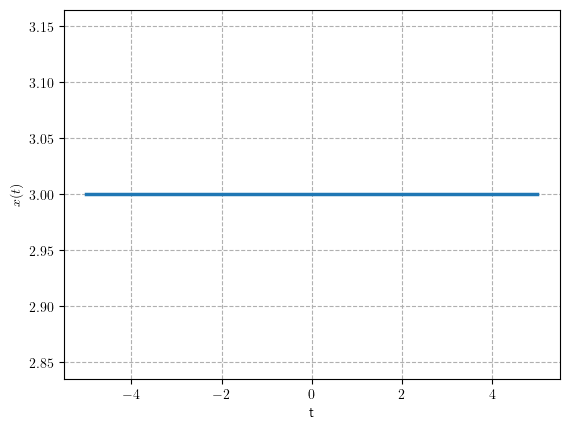

In [26]:
k = 3

# Parametros da funcao esponencial
sigma = 0
w = 0
s = sigma + 1j*w
x_exp_const =  k* np.exp(s*t)

# Visualizacao
plt.plot(t, x_exp_const, linewidth=2.5)
plt.xlabel('t')
plt.ylabel(r'$x(t)$')
plt.grid(linestyle = '--')
plt.show()

### $e^{\sigma t} \; (\omega = 0, s = \sigma)$

/Users/fabianequeiroz/miniforge3/envs/aulas/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


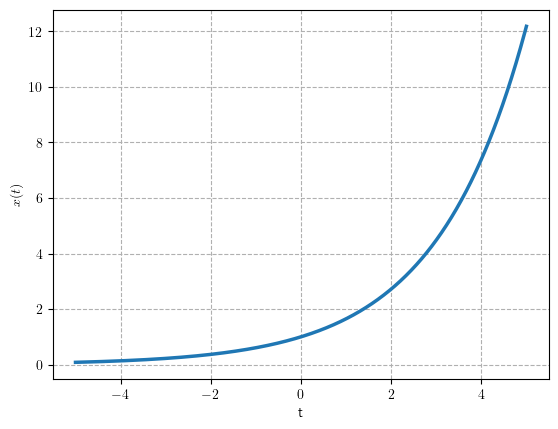

In [27]:
# Parametros da funcao esponencial
sigma = 0.5
w = 0
s = sigma + 1j*w
x_exp_mono = np.exp(s*t)

# Visualizacao
plt.plot(t, x_exp_mono, linewidth=2.5)
plt.xlabel('t')
plt.ylabel(r'$x(t)$')
plt.grid(linestyle = '--')
plt.show()

### $\cos(\omega t) \; (\sigma = 0, s = \pm j\omega)$

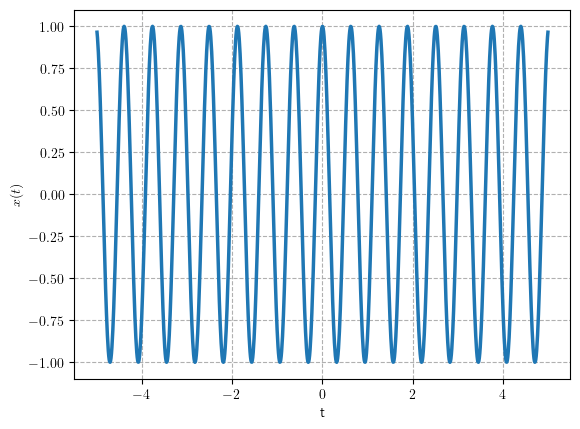

In [28]:
# Parametros da funcao esponencial
sigma = 0
w = 10
s = sigma + 1j*w
x_senoid =  np.exp(s*t)
# x_exp_senoid =  np.cos(w*t)

# Visualizacao
plt.plot(t, x_senoid, linewidth=2.5)
plt.xlabel('t')
plt.ylabel(r'$x(t)$')
plt.grid(linestyle = '--')
plt.show()

### $e^{st}\; (s = \sigma \pm j\omega)$

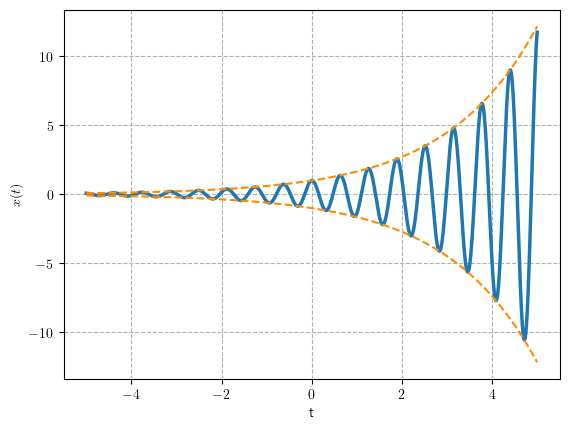

In [29]:
# Parametros da funcao esponencial
sigma = 0.5
w = 10
s = sigma + 1j*w
x_senoid_exp =  np.exp(s*t)

# Visualizacao
plt.plot(t, x_senoid_exp, linewidth=2.5)
plt.plot(t, x_exp_mono,  color = 'darkorange', linestyle = '--')
plt.plot(t, - x_exp_mono, color = 'darkorange', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$x(t)$')
plt.grid(linestyle = '--')
plt.show()

Mais a frente iremos explorar em mais detalhes a **frequencia angular** de um sinal senoidal e seu **ângulo de fase** $\sigma$. 

Também iremos explorar outras  medidas associadas a este tipo de sinal, tais como **amplitide de pico**, **período** e **frequencia**.

<img src = "../figs/cpc.jpeg" width = "300">

### Caso discreto da função exponencial:

$x[n] = e^{sn}$

/Users/fabianequeiroz/miniforge3/envs/aulas/lib/python3.9/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/Users/fabianequeiroz/miniforge3/envs/aulas/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


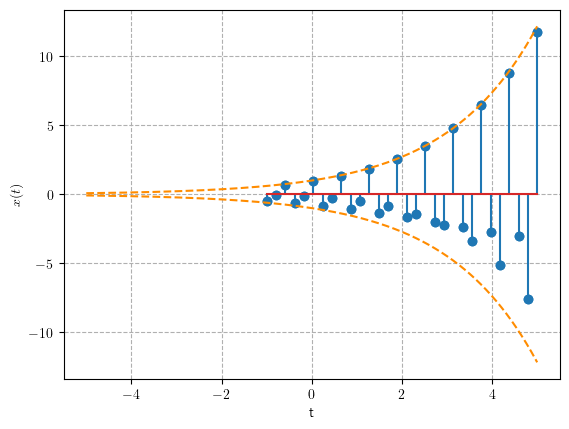

In [30]:
# Parametros da funcao esponencial
sigma = 0.5
w = 10
s = sigma + 1j*w
x_senoid_exp =  np.exp(s*t_dis)

# visualização
plt.scatter(t_dis, x_senoid_exp)
plt.stem(t_dis, x_senoid_exp)
plt.plot(t, x_exp_mono,  color = 'darkorange', linestyle = '--')
plt.plot(t, - x_exp_mono, color = 'darkorange', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$x(t)$')
plt.grid(linestyle = '--')
plt.show()

# Energia e Potência de um sinal <a class="anchor" id="chapter_2"></a>

## Tamanho de um Sinal <a class="anchor" id="section_2_1"></a>


O tamanho de qualquer entidade é um número que indica a largura ou o comprimento da entidade, porém , genericamente falando, a amplitude do sinal varia com o tempo. 

**Como um sinal que existe em um certo intervalo de tempo com amplitude variante pode ser medido por um número que irá indicar o tamanho ou a força do sinal?** 

Tal medida deve considerar não apenas a **amplitude** do sinal, mas também sua **duração**. 



Por exemplo, se quisermos utilizar um único número $v$ como medida do tamanho de um ser humano, devemos considerar não somente seu peso, mas também sua altura. Se fizermos uma consideração que a forma da pessoa é um cilindro cuja variável é o raio r (o qual varia com a altura $h$), então uma possível medida do tamanho de uma pessoa de altura $H$ é o volume $v$ da pessoa:

$$v = \pi \sum_0^H r^2(h) dh$$


## Energia de um Sinal <a class="anchor" id="section_2_2"></a>


Argumentando desta forma, podemos considerar a área abaixo do sinal $x(t)$ sob um determinado intervalo $[t_1, t_2]$ como uma possível medida de seu tamanho, pois a área irá considerar não somente a amplitude, mas também sua duração. Essa área abaixo da curva é chamada de **energia** do sinal: 

$$E_x = \int_{t_1}^{t_2} x(t)dt$$


In [ ]:
# Taxa de amostragem do sinal que iremos gerar
n = 1000

# Intervalo de tempo do sinal
t1 = 0
t2 = 2*np.pi

# Amostrando o sinal no tempo
t = np.linspace(t1, t2, n)

In [ ]:
# Valores do sinal x no período de tempo amostrado
x = lambda t: 1 + np.sin(t) 

In [ ]:
import scipy.integrate as integrate # vamos usar a scipy para calculo de integrais

# cálculo de integral (energia do sinal) 
energia, erro  = integrate.quad(x, t1, t2) # Lembre-se que este é um método numérico e portanto, tem um erro associado!
print(f'O valor da  energia (E) do sinal é  {energia}, com margem de erro de {erro}')

In [ ]:
# Vizualização
plt.plot(t, x(t), drawstyle="steps")
plt.fill_between(t, x(t), step="pre", alpha=0.4)

plt.xlabel('tempo (t)')
plt.ylabel('Amplitude  x(t)')
plt.legend(['$x(t) = 1+ sen(t)$', f'$E_x = {energia:.2f}$'])
plt.show()


Entretanto, esta medida ainda é defeituosa a áreas positivas e negativas do sinal $x(t)$ podem se cancelar. 

Dessa forma, um sinal grande poderia ser visto como um sinal pequeno, ou pior, ele poderia ter tamanho nulo!

In [ ]:
# Novo sinal
x1 = lambda t: np.sin(t) 

# cálculo de integral (energia do sinal) 
energia1, _  = integrate.quad(x1, t1, t2) 
print(f'O valor da  energia (E) do sinal é  {energia1}') # Um valor MUITO próximo a 0!


In [ ]:
# Vizualização
plt.plot(t, x1(t), drawstyle="steps")
plt.fill_between(t, x1(t), step="pre", alpha=0.4)

plt.xlabel('tempo (t)')
plt.ylabel('Amplitude  x(t)')
plt.legend(['$x(t) = sen(t)$', f'$E_x = {np.trunc(energia1)}$']) # Valor aproximado da area
plt.show()

Este problemas pode ser corrigido pela definição da energia do sinal como a área debaixo de $x^2(t)$, que é sempre positiva. 

$$E_x =  \int_{t_1}^{t_2} x(t)^2 dt\$$

In [ ]:
# correção para calculo da energia
x1_corr = lambda t: np.power(np.sin(t), 2)
# cálculo de integral (energia do sinal) 
energia2, _  = integrate.quad(x1_corr, t1, t2) 
print(f'O valor da  energia (E) do sinal é  {energia2}') # Um valor MUITO próximo a 0!

In [ ]:
# Vizualização
plt.plot(t, x1_corr(t), drawstyle="steps")
plt.fill_between(t, x1_corr(t), step="pre", alpha=0.4)

plt.xlabel('tempo (t)')
plt.ylabel('Amplitude  x(t)')
plt.legend(['$x(t) = sen(t)$', f'$E_x = {energia2:.2f}$']) # Valor aproximado da area
plt.show()

Essa definição pode ser generalizada para um **sinal complexo** $x(t)$, sendo dada por:

$$E_x = \int_{t_1}^{t_2} |x(t)|^2 dt$$

Sinal: $x(t) = e^{2j\pi t}$

In [ ]:
#Função com componente complexa que calcula o valor da amplitude do sinal para cada instante de tempo amostrado
complex_x = lambda t: np.exp(2j*np.pi*t)

#vizualização
plt.subplot(2,1,1)
plt.fill_between(t, complex_x(t).real, step="pre", alpha=0.4)
plt.plot(t, complex_x(t).real)
plt.xlabel('tempo (t)')
plt.ylabel('Real  x(t)')
plt.title(r'Parte real de $x(t)=e^{2j \pi t}$')

plt.subplot(2,1,2)
plt.plot(t, complex_x(t).imag, color='orange')
plt.fill_between(t, complex_x(t).imag, step="pre", color='orange', alpha=0.4)
plt.xlabel('tempo (t)')
plt.ylabel('Im  x(t)')
plt.title(r'Parte imaginária de $x(t)=e^{2j \pi t}$')
plt.tight_layout()
plt.show()

In [ ]:
# correção para calculo da energia do sinal complexo
complex_x_corr = lambda t: np.power(np.abs(np.exp(2j*np.pi*t)),2)
# cálculo de integral (energia do sinal) 
energia3, _  = integrate.quad(complex_x_corr, 0, 4*np.pi) 
print(f'O valor da  energia (E) do sinal é  {energia3}') 

##  Potência de um sinal <a class="anchor" id="section_2_3"></a>

De maneira mais amplas, podemos  definir a energia $E_x$ de um sinal $x$ como:

$$\Large{E = \int_{-\infty}^{\infty} |x(t)|^2 dt}$$


Contudo, perceba que **a energia do sinal deve ser finita** para que seja uma medida significativa do tamanho do sinal. 

Uma condição necessária para que a energia seja finita é que $x(t) \rightarrow 0 \;\; \text{quando} \;\; |t| \rightarrow \infty $

<img src = "../figs/energia_finita.png" width = "500">

Caso contrário a integral não irá convergir, como é o caso do exemplo abaixo:

<img src = "../figs/energia_infinita.png" width = "500">

Uma medida mais significativa do tamanho do sinal neste caso é a **energia média** do sinal, se ela existir. Esta medida é chamada
de **potência do sinal**. 

Para um sinal $x(t)$, definimos sua potência $P_x$ por

$$P = \lim_{T \rightarrow \infty} \frac{1}{T} \int_{-T/2}^{T/2} x^2(t) dt$$

Generalizando para sinais complexos: 

$$\Large{P = \lim_{T \rightarrow \infty} \frac{1}{T} \int_{-T/2}^{T/2} |x(t)|^2 dt}$$








Observações: 

* Observe que a potência do sinal $P_x$ é uma **média temporal** do quadrado da amplitude do sinal, ou seja, o  **valor médio quadrático** de $x(t)$.
* Geralmente, a potência de uma entidade ao longo de um grande intervalo de tempo aproximando do infinito existe se a entidade for periódica ou possuir uma regularidade estatística. 

## Sinais de energia e sinais de potência <a class="anchor" id="section_2_4"></a>


* Um sinal de energia é um sinal em que a energia é finita (ex: sinais não periódicos)
* Um sinal de potência é um sinal em que a potência é finita e não nula (sinais periódicos)
* Como a média é calculada em um intervalo infinitamente grande, um sinal com energia finita possui potência nula e um sinal com potência finita possui energia infinita. Portanto, um
sinal não pode ser tanto de energia quanto de potência, ou seja, eles são mutuamente exclusivos.
* Na prática, a geração física do sinal de potência é impossível, pois requer duração infinita e energia infinita.
* A soma de um sinal de energia e um sinal de potência é um sinal de potência.
* Existem sinais que não são nem de potência nem de energia. Um sinal não é um sinal de energia nem de potência se tanto a energia quanto a potência do sinal forem iguais ao infinito (ex.: o sinal rampa $r(t)$). 
* Um sinal cuja amplitude é constante ao longo de uma duração infinita é um sinal de potência (ex.: sinal degrau unitário $u(t)$).



### Exercício:

<img src = "../figs/ex_energia_potencia.png" width = "600">

<!-- ### Observando a energia e potência de um sinal que representa um fenômeno físico: -->

<!-- Em muitas aplicações, os sinais que consideramos estão diretamente relacionados a **quantidades físicas** e a partir deles pode-se extrair a **potência ou energia de um sistema físico**.  

Em circuitos elétricos, os sinais podem representar corrente ou tensão. Considere uma tensão $v(t)$ aplicada através de uma resistência $R$ e $i(t)$ é a corrente que flui através dela, conforme mostrado na figura.

<img src = "https://drive.google.com/uc?id=1fa_j0QueZQWt0iFDZ4-KHP0Dtj4fiohN" width = "500">

A potência instantânea na resistência $R$ é dada por:

$$p(t) = v(t)i(t)$$

Pela lei de Ohm:


$$p(t) = v(t)i(t) = v(t)\frac{v(t)}{R} = \frac{v^2(t)}{R}$$

Também

$$𝑝(𝑡) = 𝑖(𝑡)𝑅 ∙ 𝑖(𝑡) = 𝑖^2(𝑡)𝑅$$

<!-- A energia total dissipada no intervalo de tempo $t_1\le t\le t_2$ é 
$$\frac{1}{R} \int_{t_1}^{t_2}v^2(t)dt$$ -->

<!-- Quando os valores da resistência $R = 1Ω$, então a potência dissipada nela é conhecida como potência normalizada. Por isso

$$p(t) = v^2(t)$$

Se $v(t)$ ou $i(t)$ é denotado por um sinal de tempo contínuo $x(t)$, então a potência instantânea $p(t_0)$ é igual ao quadrado da amplitude do sinal, ou seja,

$$p(t_0) = |x(t_0)|^2$$

Portanto, a potência média ou potência normalizada de um sinal de tempo contínuo $x(t)$ é dada por,

$$P=lim_{t→∞}\frac{1}{t}∫_{−(t/2)}^{t/2}|x(t)|^2dt \;\;\text{Watts}$$

A energia total ou energia normalizada de um sinal de tempo contínuo é definida como

$$E=lim_{t→∞}∫_{−(t/2)}^{t/2}|x(t)|^2dt \;\;\text{Joules}$$ -->